# First Visualization of avaiable Data

Dieses Jupyter Notebook wurde zur Tabellenerzeugung erstellt

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [66]:
df = pd.read_excel('Data/Kaufpreis.xlsx')
df = df.iloc[6:, :]
df.columns = ['ID', 'Gemeinde', 'Bauland_Anzahl', 'Baureifes_Anzahl', 'BaulandQM', 'BaureifQM', 'BaulandEuro', 'BaureifEuro', 'BaulandEQM', 'BaureifEQM']

In [67]:
df['Bauland_Anzahl'].replace('-', np.nan, inplace=True)
df.dropna(subset = ['Bauland_Anzahl'], inplace=True)
df = df[~(df['Bauland_Anzahl'] <= 10)]
print(df)

            ID                           Gemeinde  Bauland_Anzahl  \
6          091                         Oberbayern          5262.0   
7        09161               Ingolstadt (Krfr.St)            73.0   
8        09162          München, Landeshauptstadt           846.0   
9        09163                Rosenheim (Krfr.St)            51.0   
10       09171                    Altötting (Lkr)           247.0   
12    09171112                     Burghausen, St            52.0   
13    09171113                Burgkirchen a.d.Alz            18.0   
14    09171114                          Emmerting            43.0   
16    09171116                   Feichten a.d.Alz            14.0   
30    09171132                   Töging a.Inn, St            12.0   
34    09171137                          Winhöring            36.0   
35       09172         Berchtesgadener Land (Lkr)            94.0   
41    09172117                     Bischofswiesen            11.0   
42    09172118                    

In [68]:
gemeinde = df['Gemeinde'].astype(str)
collection = pd.DataFrame(gemeinde)

baulandAnz = df['Bauland_Anzahl'].astype(float)
collection['Bauland_Anzahl'] = baulandAnz

baulandEQM = df['BaulandEQM'].astype(float)
collection['BaulandEQM'] = baulandEQM

ID = df['ID'].astype(int)
collection['ID'] = ID

In [82]:
collectionArea = collection[~(collection['ID'] <= 10000)]
expensive = (collectionArea.sort_values(by=['BaulandEQM'], ascending=False)[0:15])
barplot = expensive[['Gemeinde','BaulandEQM']]
print(barplot)

                         Gemeinde  BaulandEQM
352             Pullach i.Isartal     2808.80
340                      Grünwald     2541.99
338                    Gräfelfing     2336.37
360                  Unterhaching     2008.61
347                   Oberhaching     1902.76
208               Germering, GKSt     1816.47
341                          Haar     1763.64
454                       Gauting     1637.67
220                   Olching, St     1572.87
78                   Dachau, GKSt     1550.85
82                      Karlsfeld     1537.30
461                 Starnberg, St     1509.09
207        Fürstenfeldbruck, GKSt     1489.92
210                    Gröbenzell     1348.88
335                     Brunnthal     1334.64


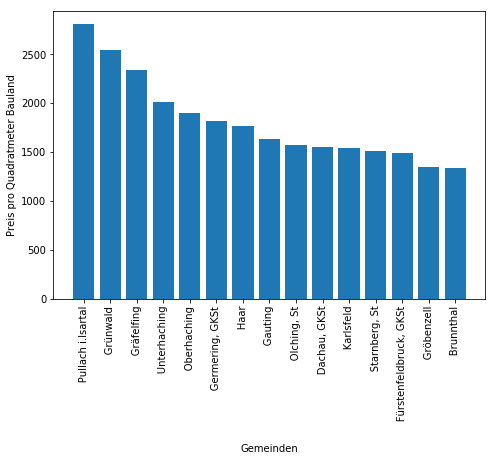

In [83]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')
plt.xlabel("Gemeinden",) # size = 16, labelpad = 6)
plt.ylabel("Preis pro Quadratmeter Bauland",) # size = 16, labelpad = 6)
ax.bar(barplot['Gemeinde'],barplot['BaulandEQM'])
plt.show()

In [54]:
collectionCounty = collection[~(collection['ID'] >= 10000)]
expensive2 = (collectionCounty.sort_values(by=['BaulandEQM'], ascending=False)[0:10])
barplotCounty = expensive2[['Gemeinde','BaulandEQM']]
print(barplotCounty)

                           Gemeinde  BaulandEQM
8         München, Landeshauptstadt     2698.30
810            Regensburg (Krfr.St)     1230.72
332                   München (Lkr)     1186.72
450                 Starnberg (Lkr)     1040.71
200          Fürstenfeldbruck (Lkr)     1012.87
7              Ingolstadt (Krfr.St)      948.29
1282             Nürnberg (Krfr.St)      906.84
75                     Dachau (Lkr)      895.84
9               Rosenheim (Krfr.St)      846.00
1502        Aschaffenburg (Krfr.St)      836.30


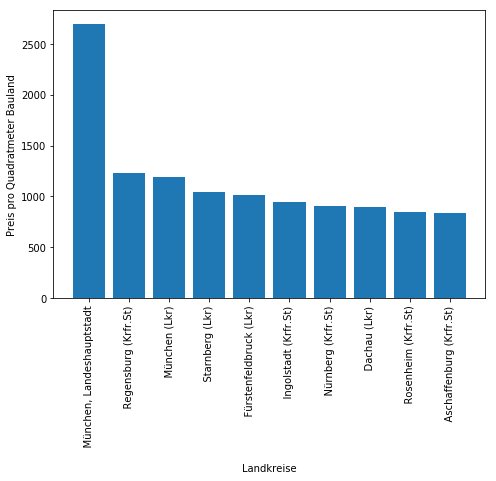

In [64]:
fig2 = plt.figure()
ax = fig2.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')
plt.xlabel("Landkreise",) # size = 16, labelpad = 6)
plt.ylabel("Preis pro Quadratmeter Bauland",) # size = 16, labelpad = 6)
ax.bar(barplotCounty['Gemeinde'],barplotCounty['BaulandEQM'])
plt.show()

In [84]:
df4 = pd.read_excel('Data/Bruttolohn_Bayern_2019.xlsx', sheet_name="Daten")
df4 = df4.iloc[3:, 1:]
df4.columns = ['Landkreis', 'Medianlohn', 'Männer', 'Frauen', 'Ungelernte', 'Facharbeiter', 'Akademiker', '€']
df4 = df4.sort_values(by=['Medianlohn'], ascending=False)[0:10]
high = df4[['Landkreis', 'Medianlohn']]
#high = high.sort_values(by=['Medianlohn'], ascending=True)

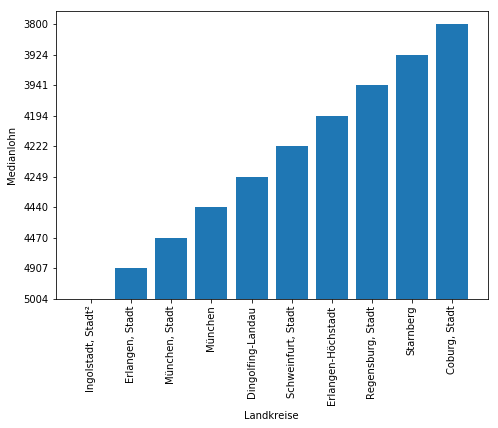

In [85]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation='vertical')
plt.xlabel("Landkreise", size = 10, labelpad = 6)
plt.ylabel("Medianlohn", size = 10, labelpad = 6)
ax.bar(high['Landkreis'],high['Medianlohn'])
plt.show()

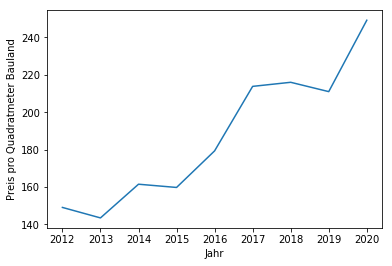

In [86]:
years = [2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012]
BaulandEQM = [249.22,211.03,216.02,213.84,179.33,159.76,161.49,143.46,149.07]
plt.xlabel("Jahr",) # size = 16, labelpad = 6)
plt.ylabel("Preis pro Quadratmeter Bauland",) # size = 16, labelpad = 6)
plt.plot(years, BaulandEQM)

## Berechnung
2. Realtive Steigung, wenn Wert für 2012 = 100 Punkte entspricht
    * 1 Punkt entspricht 1,49€
    * 249.22/1,49 = 167.261744966442953 bzw. ungefähr 167%, also ein Anstieg um 67% zwischen 2012 und 2020
    